In [274]:
import pandas as pd

In [275]:
books = pd.read_csv('books.csv', index_col='id')
# Let's drop columns we will not need 
books = books[['book_id', 'authors', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title']]

In [276]:
# Get the ratings dataset
ratings_df = pd.read_csv('ratings.csv')

# merge them
df = pd.merge(ratings_df, books[['book_id', 'title', 'original_publication_year', 'authors']], on='book_id')
df = df.loc[:,~df.columns.duplicated()]
df

,book_id,user_id,rating,title,original_publication_year,authors
0,1,314,5,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
1,1,439,3,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
2,1,588,5,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
3,1,1169,4,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
4,1,1185,4,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
...,...,...,...,...,...,...
79696,9998,51295,5,The Woman in the Dunes,1962.0,"Kōbō Abe, E. Dale Saunders"
79697,9998,51559,5,The Woman in the Dunes,1962.0,"Kōbō Abe, E. Dale Saunders"
79698,9998,52087,4,The Woman in the Dunes,1962.0,"Kōbō Abe, E. Dale Saunders"
79699,9998,52330,4,The Woman in the Dunes,1962.0,"Kōbō Abe, E. Dale Saunders"


In [277]:
# Let's check if we do not have any data missing
print('Null values: {}'.format(sum(df.isnull().any())))
# Or if there are not duplicates
print('duplicates: {}'.format(sum(df.duplicated())))

Null values: 1
duplicates: 118


In [278]:
# Lets delete duplicates
df.drop_duplicates(inplace=True)
print('duplicates: {}'.format(sum(df.duplicated())))

duplicates: 0


In [298]:
print('Data Summary:')
print('Number of ratings: {}'.format(len(df)))
print('Number of users: {}'.format(len(df['user_id'].unique())))
print('Number of books: {}'.format(len(df['book_id'].unique())))
print('Mean rating: {}'.format(round(df['rating'].mean(),2)))
print('Mean number of ratings per book: {}'.format(round(ratings['num of ratings'].mean(),2)))

Data Summary:
Number of ratings: 79583
Number of users: 28906
Number of books: 812
Mean rating: 3.86
Mean number of ratings per book: 98.01


In [280]:
df['rating'].describe()

count    79583.000000
mean         3.861151
std          0.985824
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [281]:
# Some EDA
ratings = pd.DataFrame(df.groupby('title')['rating'].mean()).sort_values(ascending=False, by='rating')
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings

,rating,num of ratings
title,,
Still Life with Woodpecker,4.777778,99
The Beautiful and Damned,4.660000,100
Villa Incognito,4.625000,96
"Peter and the Shadow Thieves (Peter and the Starcatchers, #2)",4.557143,70
The Taste of Home Cookbook,4.550000,100
...,...,...
The Woman in White,2.880000,100
The Chamber,2.880000,100
"Pearls of Lutra (Redwall, #9)",2.800000,100


<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

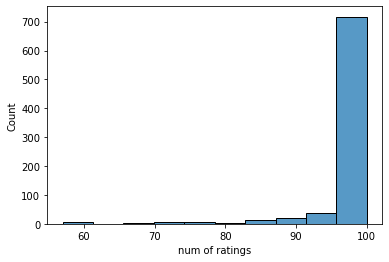

In [282]:
import seaborn as sns

sns.histplot(ratings, x='num of ratings', bins=10)

<AxesSubplot:xlabel='rating', ylabel='Count'>

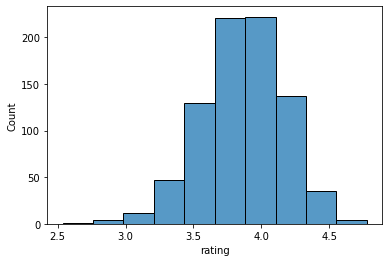

In [283]:
sns.histplot(ratings, x='rating', bins=10)

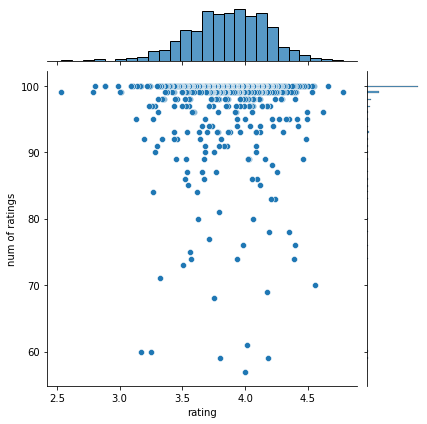

In [284]:
sns.jointplot(x='rating', y='num of ratings', data=ratings)

In [288]:
# Best and least rated books
ratings.sort_values(by='rating', ascending=False)

,rating,num of ratings
title,,
Still Life with Woodpecker,4.777778,99
The Beautiful and Damned,4.660000,100
Villa Incognito,4.625000,96
"Peter and the Shadow Thieves (Peter and the Starcatchers, #2)",4.557143,70
The Taste of Home Cookbook,4.550000,100
...,...,...
The Woman in White,2.880000,100
The Chamber,2.880000,100
"Pearls of Lutra (Redwall, #9)",2.800000,100


In [293]:
# Least and most number of times rated books
ratings.sort_values(by=['num of ratings', 'rating'], ascending=False)

,rating,num of ratings
title,,
The Beautiful and Damned,4.660000,100
The Taste of Home Cookbook,4.550000,100
A People's History of the United States,4.540000,100
Girl with a Pearl Earring,4.530000,100
Deception Point,4.500000,100
...,...,...
Loving What Is: Four Questions That Can Change Your Life,3.250000,60
Ghostwritten,3.166667,60
"Jesus Freaks: Stories of Those Who Stood for Jesus, the Ultimate Jesus Freaks (Jesus Freaks, #1)",4.186441,59


In [300]:
df.to_csv('ratings_with_features.csv', index=False)

In [301]:
pd.read_csv('ratings_with_features.csv')

,book_id,user_id,rating,title,original_publication_year,authors
0,1,314,5,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
1,1,439,3,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
2,1,588,5,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
3,1,1169,4,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
4,1,1185,4,Harry Potter and the Half-Blood Prince (Harry ...,2005.0,"J.K. Rowling, Mary GrandPré"
...,...,...,...,...,...,...
79578,9998,51295,5,The Woman in the Dunes,1962.0,"Kōbō Abe, E. Dale Saunders"
79579,9998,51559,5,The Woman in the Dunes,1962.0,"Kōbō Abe, E. Dale Saunders"
79580,9998,52087,4,The Woman in the Dunes,1962.0,"Kōbō Abe, E. Dale Saunders"
79581,9998,52330,4,The Woman in the Dunes,1962.0,"Kōbō Abe, E. Dale Saunders"
